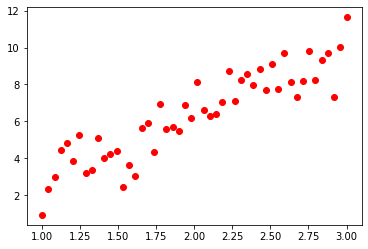

In [1]:
# 1 导入需要的模块和包 
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
# 嵌入模式
%matplotlib inline   

#  2 生成数据集  
# 2.1 特征数据 
x_data = np.linspace(1,3,num=50,endpoint=True,retstep=0,dtype=np.float32)

# 2.2 目标数据：添加噪声 
diff = np.random.randn(50)
y_data = 3 * x_data+0.1 + diff
y_data = np.array(y_data, dtype=np.float32) 

# 2.3 组建数据集:将所有样本组合起来 
x_data = np.expand_dims(x_data,axis=1)
y_data = np.expand_dims(y_data,axis=1)

# 2.4 画图展示结果 
plt.plot(x_data,y_data,"ro")
plt.show()


# 3 创建线性回归模型 
class MySimpleLinearRegression(torch.nn.Module):
    def __init__(self):
        super(MySimpleLinearRegression,self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self,x):
        out = self.linear(x)
        return out 

    
# 4 训练模型并测试
def train_and_test():
    # 4.1 创建模型，选择GPU或者cpu
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = MySimpleLinearRegression()
        model.to(device)
    else:
        device = torch.device("cpu")
        model = MySimpleLinearRegression()
        model.to(device)
        
    # 4.2 创建优化目标和优化方法
    
    criterion = torch.nn.MSELoss() # 均方误差 
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01) # 随机梯度下降优化
    
    for i in range(500):
        i+=1
        
        # numpy数据转为tensor 
        inputs = torch.from_numpy(x_data).to(device)
        labels = torch.from_numpy(y_data).to(device)
        
        # 4.3 前向传播 
        output = model(inputs)
        
        # 4.4 计算损失
        loss = criterion(output, labels)
        
        # 4.5 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        
        loss.backward()
        
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 10 == 0:
            print('loss值：', loss.item())
        
    # 4.6 测试模式
    model.eval()
    y_predict = model(torch.from_numpy(x_data)).data.numpy()
    plt.plot(x_data, y_data, "ro")
    plt.plot(x_data, y_predict, "k")
    plt.show()

loss值： 6.654595851898193
loss值： 2.0426411628723145
loss值： 1.5370522737503052
loss值： 1.4721521139144897
loss值： 1.4547921419143677
loss值： 1.442800760269165
loss值： 1.4316481351852417
loss值： 1.4208414554595947
loss值： 1.4103214740753174
loss值： 1.40007483959198
loss值： 1.390094518661499
loss值： 1.3803731203079224
loss值： 1.3709038496017456
loss值： 1.3616803884506226
loss值： 1.352696418762207
loss值： 1.3439455032348633
loss值： 1.3354216814041138
loss值： 1.3271191120147705
loss值： 1.3190319538116455
loss值： 1.311154842376709
loss值： 1.3034818172454834
loss值： 1.2960079908370972
loss值： 1.2887282371520996
loss值： 1.2816375494003296
loss值： 1.2747308015823364
loss值： 1.268003225326538
loss值： 1.261449933052063
loss值： 1.255067229270935
loss值： 1.248849868774414
loss值： 1.2427939176559448
loss值： 1.236895203590393
loss值： 1.2311495542526245
loss值： 1.225553035736084
loss值： 1.2201017141342163
loss值： 1.2147917747497559
loss值： 1.2096195220947266
loss值： 1.2045819759368896
loss值： 1.1996747255325317
loss值： 1.1948949098587036

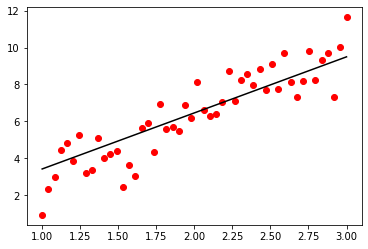

In [2]:
train_and_test()